In this we used MLP skeleton code and trained the model for two configuration to increase the accuracy.:
-->[1] Number of the layers: 3 with progressive filters - 16, 32, 64
        Optimizer: stochastic gradient descent (with learning rate: 0.01)
--->[2] Number of the layer: 2 with progressive filters - 32, 64
        Optimizer: Adam (Referenced from internet, it is like general gradient descent, but it performs gradient 
        descent on the random selection of the dataset instead of whole data.

In [1]:
# Importing libraries

import numpy as np
from keras.preprocessing import image
import cv2 as cv
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
def process(container_path):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    train_img = []
    counts = []
    for direc in folders:
        s = 0
        for file in direc.iterdir():
            s += 1
            img = imread(file)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            
            # normalizing the array 
            img_pred = img_pred / 255
            train_img.append(img_pred)
        counts.append(s)
    
    X_train = np.array(train_img)
    return X_train,counts,categories

In [8]:
# Path to the dataset

paths = r"D:\DOC\COLLEGE DOC\NOTES\SEMESTER 4\Data analysis\fruits\fruits-360"

In [9]:
# Loading Training dataset
X_train,counts,categories = process(paths+"\Training")
y_train = []
for i,a in enumerate(counts):
    b = np.zeros(a) + i
    y_train = np.concatenate((y_train,b), axis=0)

print("Trainig Files imported successfully")
print("X train of lenght",len(X_train))
print("The number of images in each folders are", counts)

# Testing dataset
X_test,counts,categories = process(paths+"\Test")
y_test = []
for i,a in enumerate(counts):
    b = np.zeros(a) + i
    y_test = np.concatenate((y_test,b), axis=0)
    
print("Test Files imported successfully")
print("X test of lenght",len(X_test))
print("The number of images in each folders are", counts)

Trainig Files imported successfully
X train of lenght 67692
The number of images in each folders are [492, 444, 480, 492, 481, 492, 456, 492, 492, 429, 490, 492, 672, 492, 427, 491, 490, 450, 490, 450, 462, 490, 492, 492, 490, 702, 492, 738, 738, 492, 492, 492, 450, 490, 490, 450, 462, 392, 468, 490, 468, 702, 297, 490, 984, 492, 490, 490, 492, 471, 490, 492, 490, 464, 490, 490, 466, 471, 490, 492, 490, 490, 490, 490, 490, 426, 300, 490, 738, 492, 492, 480, 654, 534, 450, 445, 438, 479, 492, 490, 492, 738, 492, 492, 696, 490, 702, 300, 490, 666, 711, 490, 490, 444, 702, 666, 666, 492, 492, 490, 493, 490, 447, 420, 900, 492, 450, 450, 453, 450, 450, 490, 492, 490, 492, 490, 492, 738, 490, 490, 738, 672, 738, 479, 492, 684, 367, 474, 459, 735, 475]
Test Files imported successfully
X test of lenght 22688
The number of images in each folders are [164, 148, 160, 164, 161, 164, 152, 164, 164, 144, 166, 164, 219, 164, 143, 166, 166, 152, 166, 150, 154, 166, 164, 164, 166, 234, 164, 246, 246, 

In [10]:
print("The number of fruits categories are", len(categories))
print("Total number of images are", len(X_train)+len(y_train))

The number of fruits categories are 131
Total number of images are 135384


In [11]:
print("X_train has a shape of", X_train.shape)
print("X_test has a shape of", X_test.shape)

print("y_train has a shape of", y_train.shape)
print("y_test has a shape of", y_test.shape)

X_train has a shape of (67692, 50, 50, 3)
X_test has a shape of (22688, 50, 50, 3)
y_train has a shape of (67692,)
y_test has a shape of (22688,)


In [12]:
print("The fruits in the training set are\n")
categories

The fruits in the training set are



['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [13]:
def predict_label(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(categories[int(y[index])])

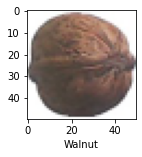

In [18]:
predict_label(X_train, y_train, 67000)

Below model(cnn2) has following configuration:
 Number of the layers: 3 with progressive filters - 16, 32, 64
        Optimizer: stochastic gradient descent (with learning rate: 0.01)

In [4]:
from sklearn.metrics import confusion_matrix , classification_report

cnn2 = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(50,50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50,50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(30, activation='relu'),
    layers.Dense(131, activation='softmax')
])

In [5]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
cnn2.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn2.fit(X_train, y_train, epochs = 20)

Epoch 1/20
2116/2116 [==============================] - 52s 25ms/step - loss: 0.0067 - accuracy: 0.9987
Epoch 2/20
2116/2116 [==============================] - 50s 23ms/step - loss: 0.0122 - accuracy: 0.9972
Epoch 3/20
2116/2116 [==============================] - 48s 23ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 4/20
2116/2116 [==============================] - 50s 23ms/step - loss: 0.0152 - accuracy: 0.9973
Epoch 5/20
2116/2116 [==============================] - 51s 24ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 6/20
2116/2116 [==============================] - 51s 24ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 7/20
2116/2116 [==============================] - 50s 24ms/step - loss: 8.2393e-04 - accuracy: 1.0000
Epoch 8/20
2116/2116 [==============================] - ETA: 0s - loss: 6.3376e-04 - accuracy: 1.00 - 50s 24ms/step - loss: 6.3359e-04 - accuracy: 1.0000
Epoch 9/20
2116/2116 [==============================] - 50s 24ms/step - loss: 4.1260e-04 - accuracy: 1.0000
Epoch 

In [19]:
cnn2.evaluate(X_test,y_test)

709/709 [==============================] - 6s 8ms/step - loss: 0.4841 - accuracy: 0.9391


[0.4840969741344452, 0.9390867352485657]

In [22]:
y_pred = cnn2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       164
         1.0       0.92      0.91      0.92       148
         2.0       0.99      1.00      1.00       160
         3.0       0.97      0.90      0.93       164
         4.0       0.77      1.00      0.87       161
         5.0       1.00      1.00      1.00       164
         6.0       0.73      0.71      0.72       152
         7.0       1.00      0.96      0.98       164
         8.0       0.80      0.94      0.86       164
         9.0       1.00      0.94      0.97       144
        10.0       0.98      1.00      0.99       166
        11.0       1.00      0.76      0.87       164
        12.0       1.00      1.00      1.00       219
        13.0       0.66      1.00      0.79       164
        14.0       0.97      1.00      0.99       143
        15.0       0.89      1.00      0.94       166
        16.0       1.00      0.75      0.86       166
        17.0       0.78    

Below model(cnn) has following configuration:
Number of the layer: 2 with progressive filters - 32, 64
        Optimizer: Adam (Referenced from internet, it is like general gradient descent, but it performs gradient 
        descent on the random selection of the dataset instead of whole data.

In [19]:
from sklearn.metrics import confusion_matrix , classification_report

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50,50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(30, activation='relu'),
    layers.Dense(131, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs = 30)

Epoch 1/30
2116/2116 [==============================] - 62s 29ms/step - loss: 1.1381 - accuracy: 0.7018
Epoch 2/30
2116/2116 [==============================] - 65s 31ms/step - loss: 0.1705 - accuracy: 0.9454
Epoch 3/30
2116/2116 [==============================] - 63s 30ms/step - loss: 0.0886 - accuracy: 0.9722
Epoch 4/30
2116/2116 [==============================] - 64s 30ms/step - loss: 0.0629 - accuracy: 0.9805
Epoch 5/30
2116/2116 [==============================] - 66s 31ms/step - loss: 0.0523 - accuracy: 0.9835
Epoch 6/30
2116/2116 [==============================] - 63s 30ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 7/30
2116/2116 [==============================] - 62s 29ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 8/30
2116/2116 [==============================] - 63s 30ms/step - loss: 0.0341 - accuracy: 0.9904
Epoch 9/30
2116/2116 [==============================] - 67s 32ms/step - loss: 0.0397 - accuracy: 0.9881
Epoch 10/30
2116/2116 [==============================] - 74s 35m

In [22]:
cnn.evaluate(X_test,y_test)

709/709 [==============================] - 5s 7ms/step - loss: 0.4920 - accuracy: 0.9604


[0.49195122718811035, 0.9603755474090576]

In [24]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:", classification_report(y_test, y_pred_classes))

Classification Report:               precision    recall  f1-score   support

         0.0       0.81      0.70      0.75       164
         1.0       1.00      1.00      1.00       148
         2.0       1.00      1.00      1.00       160
         3.0       1.00      1.00      1.00       164
         4.0       0.77      1.00      0.87       161
         5.0       0.89      1.00      0.94       164
         6.0       0.85      1.00      0.92       152
         7.0       0.95      0.87      0.91       164
         8.0       1.00      0.90      0.95       164
         9.0       0.90      0.76      0.82       144
        10.0       0.98      0.93      0.96       166
        11.0       1.00      1.00      1.00       164
        12.0       1.00      1.00      1.00       219
        13.0       1.00      1.00      1.00       164
        14.0       1.00      0.93      0.96       143
        15.0       1.00      1.00      1.00       166
        16.0       0.92      0.89      0.91       166
    

For the sake of comparison (epochs = 30) is used in both case.
CONCLUSION: In our case Adam(ref top cell of this notebook) gives accuracy of (96%)  as compared to stochastic gradient descend which gives (93%). Thus the random selection of the data for training is more efficient.
    As compared to other 2 methods( KNN and prototype), CNN gives the most efficient results.